In [1]:
import networkx as nx
import pandas as pd

# Carrega as arestas da temporada 1
df_s1 = pd.read_csv("got-s1-edges.csv", delimiter=",")
G1 = nx.from_pandas_edgelist(
    df_s1,
    source="Source",
    target="Target",
    edge_attr="Weight"
)

# Carrega as arestas da temporada 8
df_s8 = pd.read_csv("got-s8-edges.csv", delimiter=",")
G2 = nx.from_pandas_edgelist(
    df_s8,
    source="Source",
    target="Target",
    edge_attr="Weight"
)


In [2]:
df_s1.head(10) 

,Source,Target,Weight
0,NED,ROBERT,192
1,DAENERYS,JORAH,154
2,JON,SAM,121
3,LITTLEFINGER,NED,107
4,NED,VARYS,96
5,DAENERYS,DROGO,91
6,ARYA,NED,90
7,CATELYN,ROBB,90
8,BRONN,TYRION,86
9,CERSEI,NED,86


In [3]:
df_s8.head(10) 

,Source,Target,Weight
0,DAENERYS,JON,194
1,DAENERYS,TYRION,122
2,JAIME,TYRION,122
3,BRIENNE,JAIME,121
4,JON,TYRION,116
5,TYRION,VARYS,114
6,SANSA,TYRION,86
7,DAVOS,TYRION,72
8,DAENERYS,SANSA,71
9,ARYA,GENDRY,70


In [4]:
import matplotlib.pyplot as plt


# Personagens únicos
personagens_s1 = set(df_s1['Source']).union(df_s1['Target'])
personagens_s8 = set(df_s8['Source']).union(df_s8['Target'])
print('Personagens únicos S1:\n', len(personagens_s1))
print('Personagens únicos S8:\n', len(personagens_s8))

# Contagem de arestas por temporada
print('Arestas na S1:\n', df_s1.shape[0])
print('Arestas na S8:\n', df_s8.shape[0])
print('\n')

Personagens únicos S1:
 126
Personagens únicos S8:
 74
Arestas na S1:
 549
Arestas na S8:
 553




 A temporada 8 embora possua menos personaG1ens, tem mais interações entre eles.

In [5]:
from collections import Counter

# Frequência de interações por personagem
# Conta aparições em 'Source' e 'Target'
contagem_s1 = Counter(df_s1['Source']) + Counter(df_s1['Target'])
contagem_s8 = Counter(df_s8['Source']) + Counter(df_s8['Target'])
# Printa as 10 maiores frequências
#print('Top 10 Personagens S1:', contagem_s1.most_common(10))
#print('Top 10 Personagens S8:', contagem_s8.most_common(10))
# Printa as frequências
#print('Frequência S1:', contagem_s1)
#print('Frequência S8:', contagem_s8)

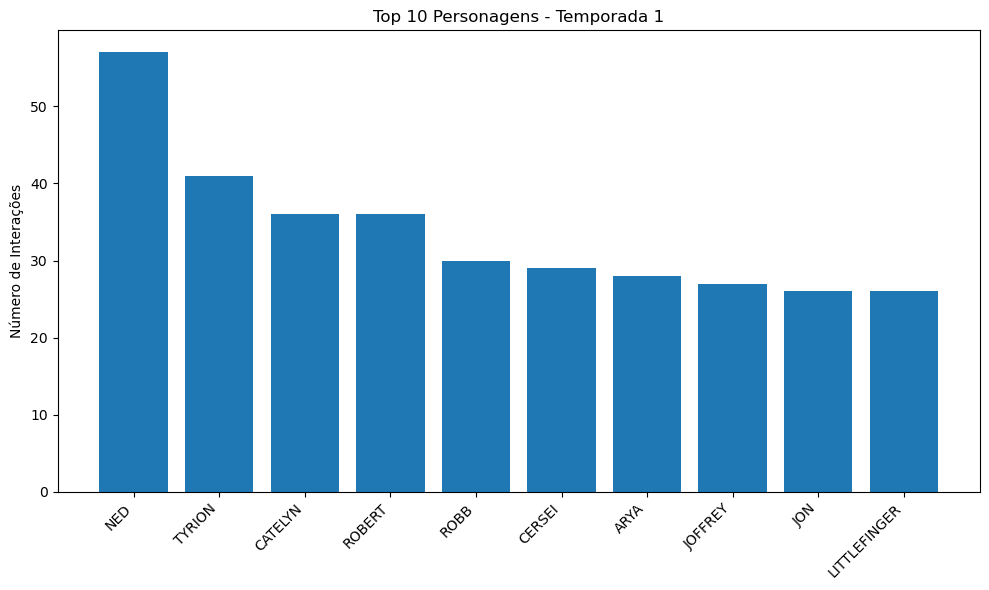

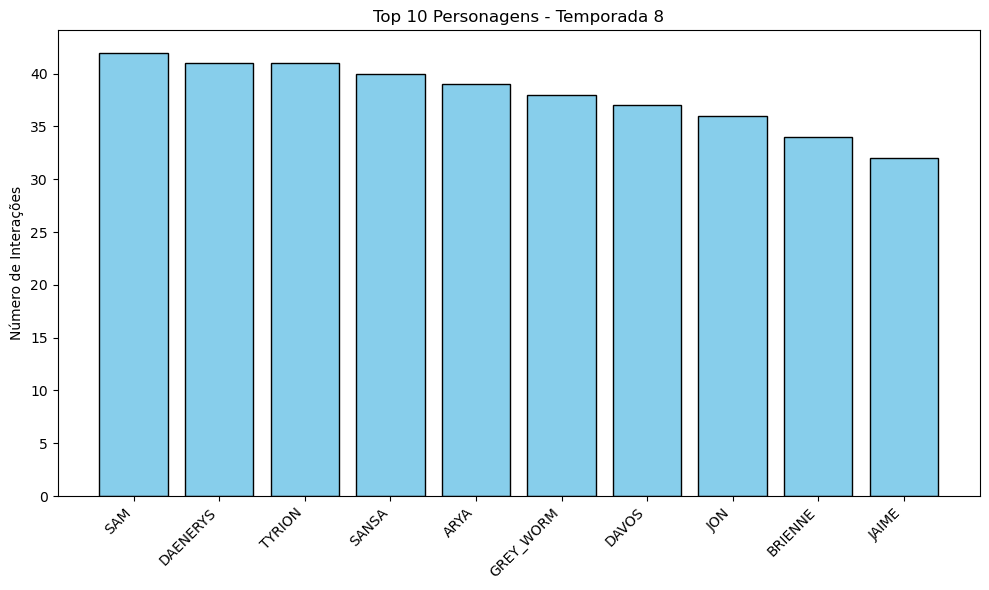

In [6]:

# Plots dos Top 10 Personagens com labels rotacionadas
# Temporada 1
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
top10_s1 = contagem_s1.most_common(10)
names_s1, freqs_s1 = zip(*top10_s1)
plt.figure(figsize=(10,6))
bars = plt.bar(names_s1, freqs_s1)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Personagens - Temporada 1')
plt.ylabel('Número de Interações')
plt.tight_layout()
plt.show()

# Temporada 8
plt.figure(figsize=(10,6))
top10_s8 = contagem_s8.most_common(10)
names_s8, freqs_s8 = zip(*top10_s8)
plt.bar(names_s8, freqs_s8, color='skyblue', edgecolor='black')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Personagens - Temporada 8')
plt.ylabel('Número de Interações')
plt.tight_layout()
plt.show()

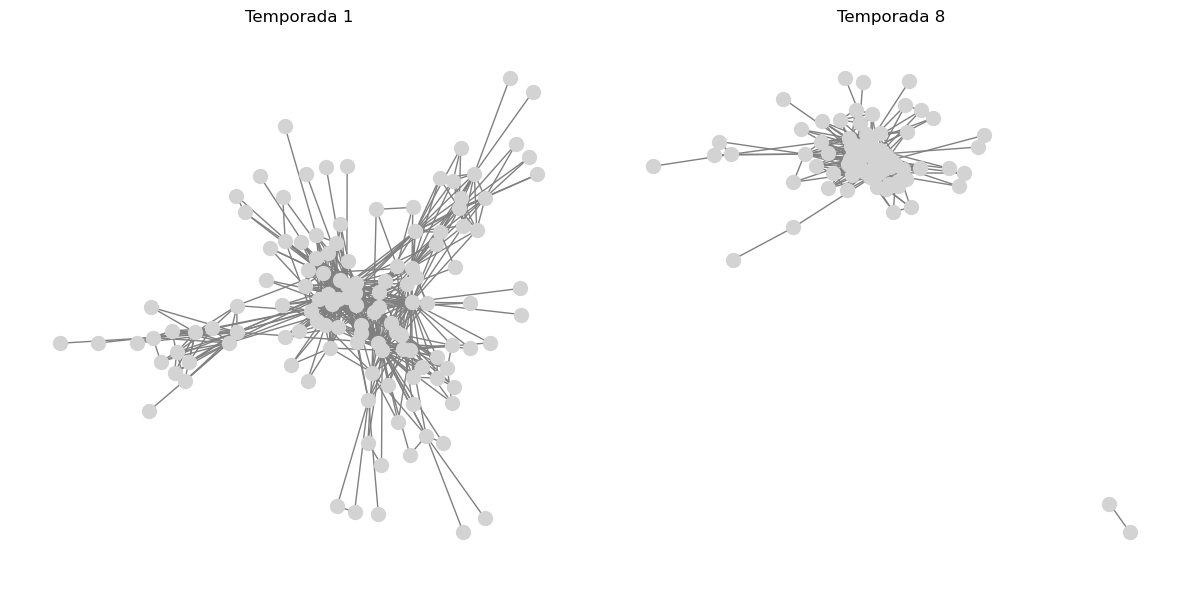

In [7]:

# Escolhe um layout único para ambos
pos1 = nx.spring_layout(G1, seed=42)
pos8 = nx.spring_layout(G2, seed=42)

# Plot ambos lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Grafo da Temporada 1
nx.draw(G1, pos1,
        ax=ax1,
        with_labels=False,
        node_color='lightgray',
        edge_color='gray',
        node_size=100)
ax1.set_title('Temporada 1')
ax1.axis('off')

# Grafo da Temporada 8
nx.draw(G2, pos8,
        ax=ax2,
        with_labels=False,
        node_color='lightgray',
        edge_color='gray',
        node_size=100)
ax2.set_title('Temporada 8')
ax2.axis('off')

plt.tight_layout()
plt.show()

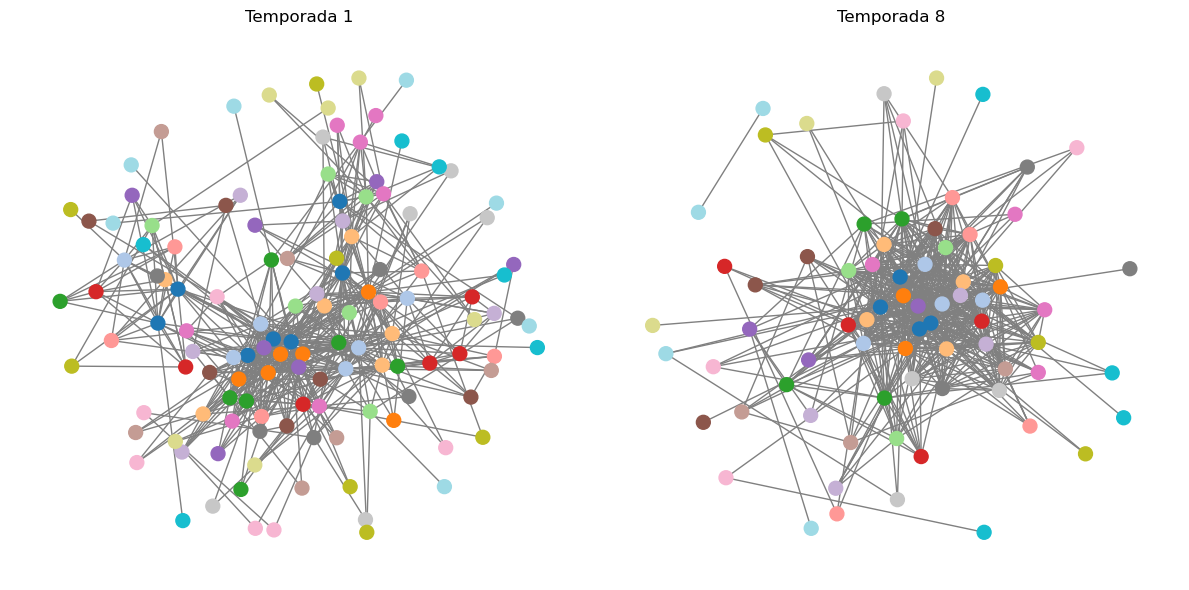

In [8]:

# 1. Escolhe um layout
pos1 = nx.spring_layout(G1, k=0.6,       # distância ótimo entre nós (menor → mais próximo)
                            scale=1.0,    # escala total da disposição
                            seed=42)
pos8 = nx.spring_layout(G2, k=1,       # distância ótimo entre nós (menor → mais próximo)
                            scale=1.0,    # escala total da disposição
                            seed=32)

# 2. Prepara cores únicas (índices) para cada nó
colors1 = list(range(G1.number_of_nodes()))
colors2 = list(range(G2.number_of_nodes()))

# 3. Plota lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Grafo Temporada 1
nx.draw(G1, pos1,
        ax=ax1,
        with_labels=False,
        node_color=colors1,
        cmap=plt.cm.tab20,   # paleta com várias cores
        edge_color='gray',
        node_size=100)
ax1.set_title('Temporada 1')
ax1.axis('off')

# Grafo Temporada 8
nx.draw(G2, pos8,
        ax=ax2,
        with_labels=False,
        node_color=colors2,
        cmap=plt.cm.tab20,
        edge_color='gray',
        node_size=100)
ax2.set_title('Temporada 8')
ax2.axis('off')

plt.tight_layout()
plt.show()

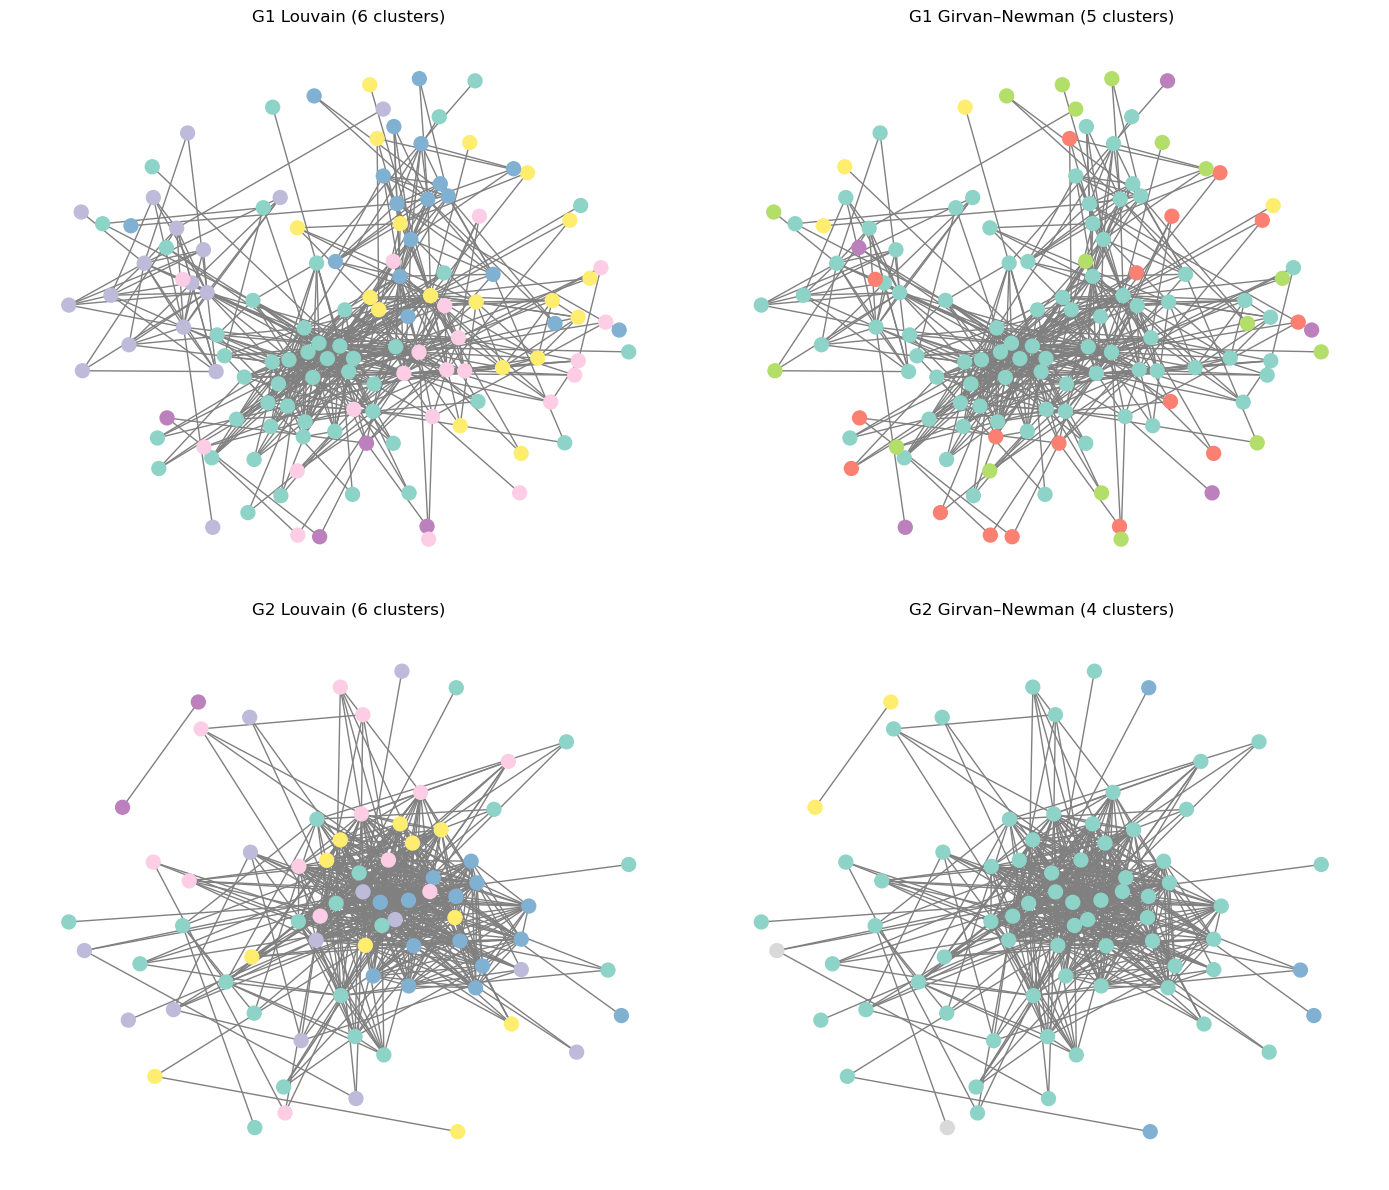

In [9]:
# Célula: Detecção de comunidades com Louvain e Girvan–Newman

import itertools
import matplotlib.pyplot as plt
import networkx as nx
from community import community_louvain
from networkx.algorithms import community as nx_comm

# --- 1. Partições Louvain
partition1_louvain = community_louvain.best_partition(G1)
partition8_louvain = community_louvain.best_partition(G2)

# --- 2. Partições Girvan–Newman otimizadas por modularidade
def best_gn_partition(G, max_clusters=5):
    comp_gen = nx_comm.girvan_newman(G)
    best_mod = -1
    best_comms = None
    # testa de 2 até max_clusters divisões
    for communities in itertools.islice(comp_gen, 1, max_clusters):
        mod = nx_comm.modularity(G, communities)
        if mod > best_mod:
            best_mod = mod
            best_comms = communities
    return list(best_comms)

# aplica ao G1 e G2
comms1_gn = best_gn_partition(G1, max_clusters=6)
comms8_gn = best_gn_partition(G2, max_clusters=6)

# converte em dicionário {nó: índice de comunidade}
partition1_gn = {n: idx for idx, com in enumerate(comms1_gn) for n in com}
partition8_gn = {n: idx for idx, com in enumerate(comms8_gn) for n in com}

# --- 3. Plot 2x2: G1-Louvain | G1-GN
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# G1 Louvain
ax = axs[0, 0]
nx.draw(G1, pos1,
        ax=ax,
        node_color=list(partition1_louvain.values()),
        cmap=plt.cm.Set3,
        with_labels=False,
        node_size=100,
        edge_color='gray')
ax.set_title(f'G1 Louvain ({len(set(partition1_louvain.values()))} clusters)')
ax.axis('off')

# G1 Girvan–Newman
ax = axs[0, 1]
nx.draw(G1, pos1,
        ax=ax,
        node_color=list(partition1_gn.values()),
        cmap=plt.cm.Set3,
        with_labels=False,
        node_size=100,
        edge_color='gray')
ax.set_title(f'G1 Girvan–Newman ({len(comms1_gn)} clusters)')
ax.axis('off')

# G2 Louvain
ax = axs[1, 0]
nx.draw(G2, pos8,
        ax=ax,
        node_color=list(partition8_louvain.values()),
        cmap=plt.cm.Set3,
        with_labels=False,
        node_size=100,
        edge_color='gray')
ax.set_title(f'G2 Louvain ({len(set(partition8_louvain.values()))} clusters)')
ax.axis('off')

# G2 Girvan–Newman
ax = axs[1, 1]
nx.draw(G2, pos8,
        ax=ax,
        node_color=list(partition8_gn.values()),
        cmap=plt.cm.Set3,
        with_labels=False,
        node_size=100,
        edge_color='gray')
ax.set_title(f'G2 Girvan–Newman ({len(comms8_gn)} clusters)')
ax.axis('off')

plt.tight_layout()
plt.show()


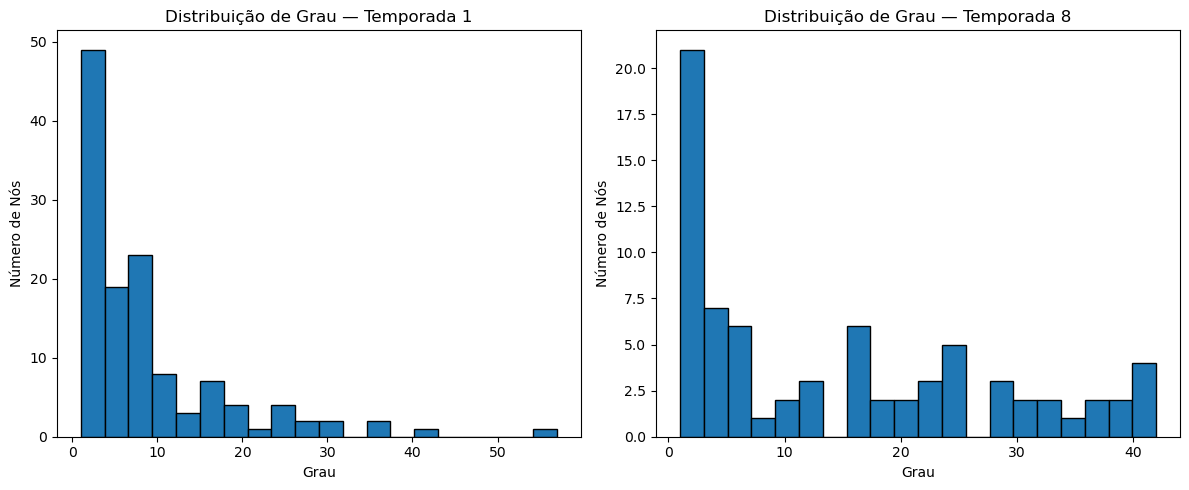

Grau médio — S1: 8.71 | S8: 14.95
Densidade    — S1: 0.0697 | S8: 0.2047
Transitividade — S1: 0.3833 | S8: 0.6442


In [10]:

# 1. Sequências de grau
deg1 = [d for _, d in G1.degree()]
deg8 = [d for _, d in G2.degree()]

# 2. Histogramas lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.hist(deg1, bins=20, edgecolor='black')
ax1.set_title('Distribuição de Grau — Temporada 1')
ax1.set_xlabel('Grau')
ax1.set_ylabel('Número de Nós')
ax2.hist(deg8, bins=20, edgecolor='black')
ax2.set_title('Distribuição de Grau — Temporada 8')
ax2.set_xlabel('Grau')
ax2.set_ylabel('Número de Nós')
plt.tight_layout()
plt.show()

# 3. Cálculo das métricas
avg_deg1    = sum(deg1) / len(deg1)
avg_deg8    = sum(deg8) / len(deg8)
density1    = nx.density(G1)
density8    = nx.density(G2)
trans1      = nx.transitivity(G1)
trans8      = nx.transitivity(G2)

print(f'Grau médio — S1: {avg_deg1:.2f} | S8: {avg_deg8:.2f}')
print(f'Densidade    — S1: {density1:.4f} | S8: {density8:.4f}')
print(f'Transitividade — S1: {trans1:.4f} | S8: {trans8:.4f}')

### Distribuição de Grau
- **Temporada 1** apresenta uma distribuição de grau mais ampla, com alguns personagens muito conectados (cauda mais longa) e muitos de baixo grau.
- **Temporada 8** mostra uma distribuição mais concentrada em torno de valores médios, indicando menos heterogeneidade nas interações.

### Métricas Principais

- **Grau médio**:  
  - S1 = **8.71** 
  - S8 = **14.95**
    
  A maior média em S8 sugere que os personagens, em média, interagem com mais colegas do que na última Primeira Temporada.

- **Densidade**:  
  - S1 =  **0.0697**
  - S8 =  **0.2047**

  Uma densidade maior em S8 indica uma rede mais coesa globalmente, enquanto em S1 as conexões são mais esparsas.

- **Transitividade (Clustering global)**:  
  - S1 = **0.3833**  
  - S8 = **0.6442**
    
  Transitividade mais alta em S8 revela que, quando A se conecta a B e B a C, há maior probabilidade de A também estar conectado a C do que em S1.

---

**Conclusão**:  
A rede da primeira temporada é mais densa, coesa e heterogênea, refletindo um elenco amplo e muitas interações cruzadas. Na oitava temporada, com menos personagens principais em cena, a rede fica mais esparsa, com grau médio e clustering reduzidos.


In [11]:
# Célula de Código: Identificação dos 3 personagens mais centrais

import networkx as nx

# Supõe-se que G1 (Temporada 1) e G2 (Temporada 8) já estejam carregados

# 1. Calcula cada centralidade
cent_deg1     = nx.degree_centrality(G1)
cent_btwn1    = nx.betweenness_centrality(G1, normalized=True)
cent_close1   = nx.closeness_centrality(G1)
cent_eig1     = nx.eigenvector_centrality(G1, max_iter=1000)

cent_deg8     = nx.degree_centrality(G2)
cent_btwn8    = nx.betweenness_centrality(G2, normalized=True)
cent_close8   = nx.closeness_centrality(G2)
cent_eig8     = nx.eigenvector_centrality(G2, max_iter=1000)

# 2. Função para extrair top 3
def top3(d):
    return sorted(d.items(), key=lambda x: x[1], reverse=True)[:3]

# 3. Imprime resultados
print("Temporada 1:")
print("  Grau:        ", top3(cent_deg1))
print("  Intermediação:", top3(cent_btwn1))
print("  Proximidade:  ", top3(cent_close1))
print("  Autovetor:    ", top3(cent_eig1))

print("\nTemporada 8:")
print("  Grau:        ", top3(cent_deg8))
print("  Intermediação:", top3(cent_btwn8))
print("  Proximidade:  ", top3(cent_close8))
print("  Autovetor:    ", top3(cent_eig8))

Temporada 1:
  Grau:         [('NED', 0.456), ('TYRION', 0.328), ('ROBERT', 0.28800000000000003)]
  Intermediação: [('NED', 0.3032802081478768), ('TYRION', 0.16302743524270866), ('CATELYN', 0.11828405295282027)]
  Proximidade:   [('NED', 0.628140703517588), ('ROBERT', 0.5530973451327433), ('CATELYN', 0.5506607929515418)]
  Autovetor:     [('NED', 0.3150820196903642), ('ROBERT', 0.24818996690338857), ('CERSEI', 0.23926199958075808)]

Temporada 8:
  Grau:         [('SAM', 0.5753424657534246), ('DAENERYS', 0.5616438356164384), ('TYRION', 0.5616438356164384)]
  Intermediação: [('DAENERYS', 0.13390159981644), ('SAM', 0.09913291196077363), ('ARYA', 0.09902087596468986)]
  Proximidade:   [('SAM', 0.6770077894171367), ('DAENERYS', 0.670434898257747), ('TYRION', 0.670434898257747)]
  Autovetor:     [('TYRION', 0.21789621436284157), ('SAM', 0.21715160565017616), ('SANSA', 0.21581251261754122)]


## Identificação dos 3 Personagens Mais Centrais

### Temporada 1
- **Centralidade de Grau** (Freeman, 1979): Ned (0,456), Tyrion (0,328), Robert (0,288)  
- **Intermediação** (Freeman, 1977): Ned (0,303), Tyrion (0,163), Catelyn (0,118)  
- **Proximidade** (Sabidussi, 1966): Ned (0,628), Robert (0,553), Catelyn (0,551)  
- **Autovetor** (Bonacich, 1972): Ned (0,315), Robert (0,248), Cersei (0,239)  

### Temporada 8
- **Centralidade de Grau**: Sam (0,575), Daenerys (0,562), Tyrion (0,562)  
- **Intermediação**: Daenerys (0,134), Sam (0,099), Arya (0,099)  
- **Proximidade**: Sam (0,677), Daenerys (0,670), Tyrion (0,670)  
- **Autovetor**: Tyrion (0,218), Sam (0,217), Sansa (0,216)  

---

### Conceitos de Proximidade e Autovetor
- **Proximidade** mede o quão “perto” um nó está de todos os demais, calculada como o inverso da soma das distâncias mínimas até todos os outros vértices (Sabidussi, 1966; Freeman, 1979). Um valor alto indica que o personagem pode alcançar rapidamente qualquer outro na rede – em S1, Ned lidera, refletindo sua posição central na trama inicial; em S8, Sam e Daenerys assumem esse papel em um elenco mais enxuto.  
- **Autovetor** atribui importância não apenas pelo número de conexões, mas pela qualidade delas: conexões com nós de alta centralidade também contam mais (Bonacich, 1972; Newman, 2010). Ned lidera em S1, pois está vinculado a personagens centrais; em S8, Tyrion torna-se o vértice de maior “influência estrutural”, já que suas relações se dão com os poucos protagonistas restantes com altos graus.  

---

### Personagens Centrais em Ambas as Temporadas
Entre todos os top 3, **Tyrion** aparece em **Grau** tanto na S1 quanto na S8, e também em **Intermediação** (S1) e **Proximidade**/ **Autovetor** (S8). Esse padrão sugere que, mesmo com a mudança drástica no elenco e na densidade da rede, Tyrion mantém um papel estrutural chave ao longo de toda a série.

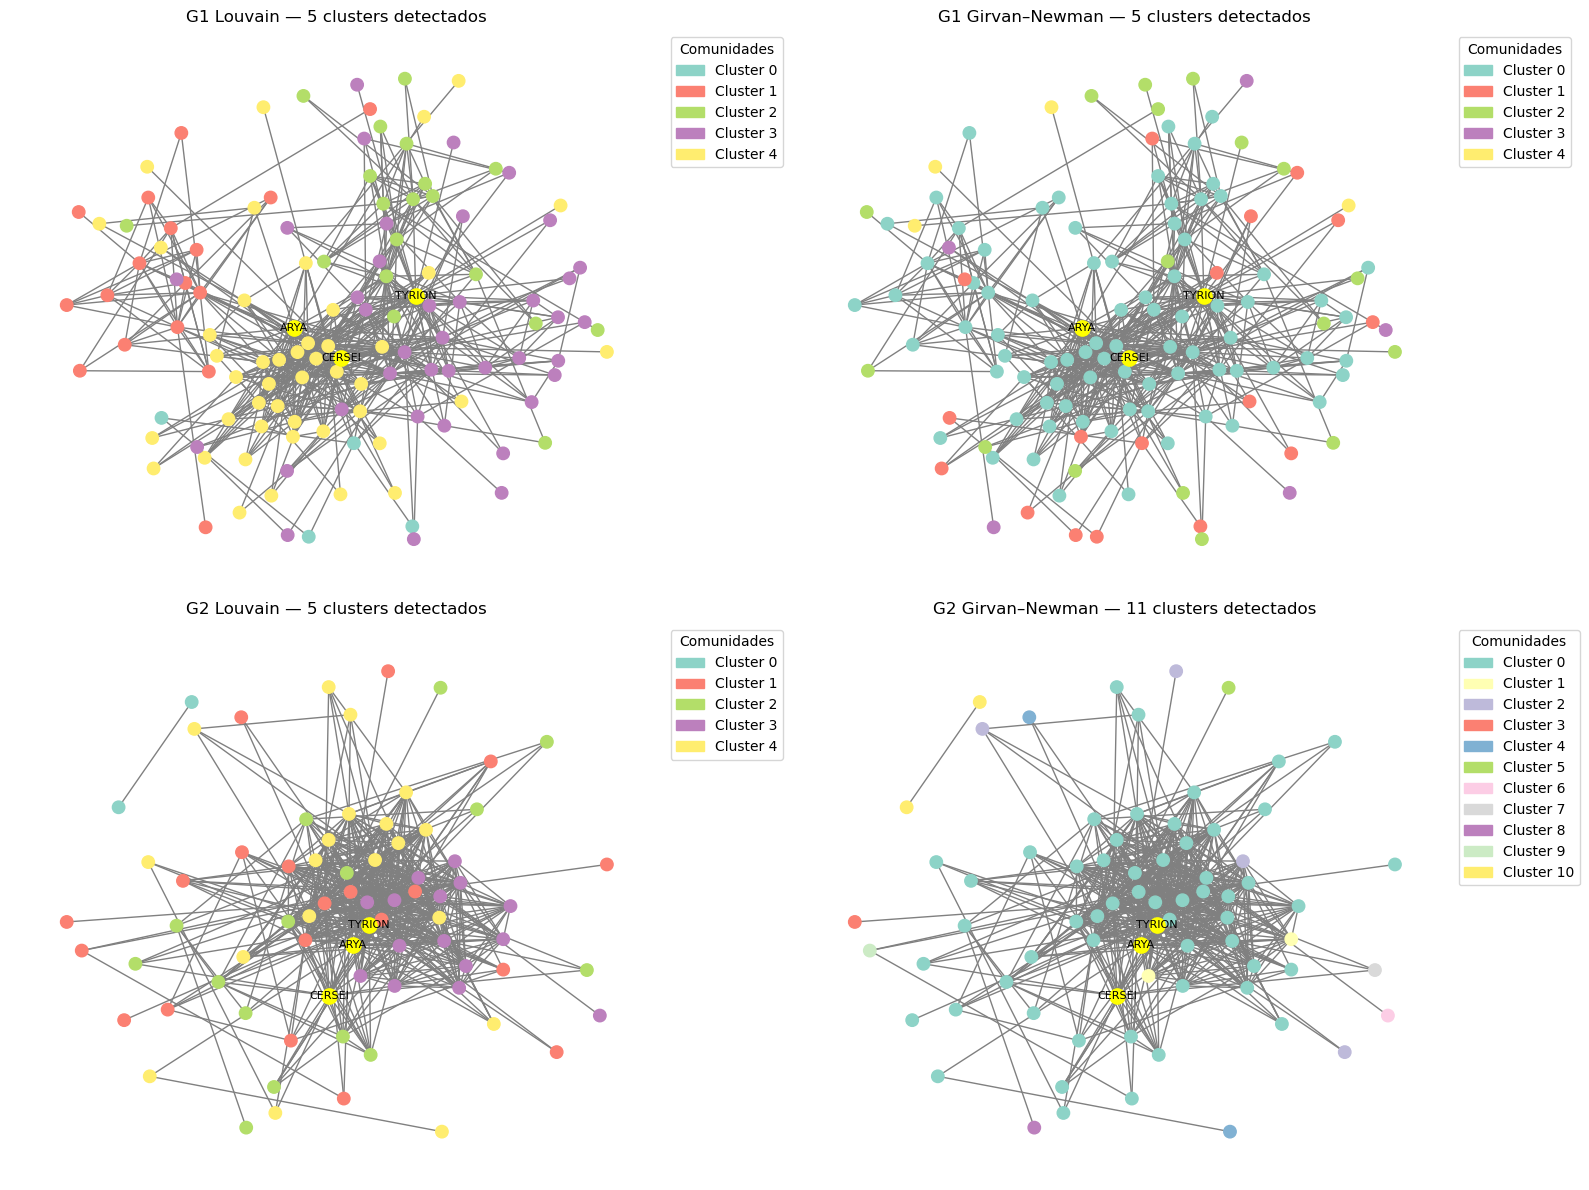

In [12]:
from matplotlib.patches import Patch
# --- 1. Partições Louvain
partition1_louvain = community_louvain.best_partition(G1)
partition8_louvain = community_louvain.best_partition(G2)

# --- 2. Partições Girvan–Newman otimizadas por modularidade
def best_gn_partition(G, max_clusters=5):
    comp_gen = nx_comm.girvan_newman(G)
    best_mod = -1
    best_comms = None
    for communities in itertools.islice(comp_gen, 1, max_clusters):
        mod = nx_comm.modularity(G, communities)
        if mod > best_mod:
            best_mod = mod
            best_comms = communities
    return list(best_comms)

comms1_gn = best_gn_partition(G1, max_clusters=10)
comms8_gn = best_gn_partition(G2, max_clusters=10)
partition1_gn = {n: idx for idx, com in enumerate(comms1_gn) for n in com}
partition8_gn = {n: idx for idx, com in enumerate(comms8_gn) for n in com}

# --- 4. Função de desenho com legenda
# Nós a destacar (ex: Aria e Tyrion)
highlight = {'ARYA', 'TYRION','CERSEI'}

def draw_with_legend(G, pos, partition, ax, title):
    communities = sorted(set(partition.values()))
    cmap = plt.cm.Set3
    # desenha nós e arestas
    nx.draw_networkx_nodes(G, pos,
                           node_color=list(partition.values()),
                           cmap=cmap,
                           node_size=80,
                           ax=ax)
    nx.draw_networkx_edges(G, pos, ax=ax, edge_color='gray')
    # destaca nós de interesse
    nx.draw_networkx_nodes(G, pos,
                           nodelist=[n for n in highlight if n in G.nodes()],
                           node_color='Yellow',
                           node_size=120,
                           ax=ax)
    nx.draw_networkx_labels(G, pos,
                            labels={n: n for n in highlight if n in G.nodes()},
                            font_color='black',
                            font_size=8,
                            ax=ax)
    # cria legendas só para cores presentes
    handles = [Patch(color=cmap(i / max(1, (len(communities) - 1))), label=f'Cluster {i}')
               for i in communities]
    ax.legend(handles=handles, title='Comunidades',
              bbox_to_anchor=(1, 1), loc='upper left')
    ax.set_title(f'{title} — {len(communities)} clusters detectados')
    ax.axis('off')

# --- 5. Plot 2x2 com legendas
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
draw_with_legend(G1, pos1, partition1_louvain, axs[0,0], 'G1 Louvain')
draw_with_legend(G1, pos1, partition1_gn,     axs[0,1], 'G1 Girvan–Newman')
draw_with_legend(G2, pos8, partition8_louvain, axs[1,0], 'G2 Louvain')
draw_with_legend(G2, pos8, partition8_gn,     axs[1,1], 'G2 Girvan–Newman')
plt.tight_layout()
plt.show()